<a href="https://colab.research.google.com/github/ehyun9809/ml/blob/main/week7_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK1

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
%matplotlib inline

In [4]:
cd /content/drive/MyDrive/Hands-On-Data-Analysis-with-Pandas-2nd-edition/ch_05

/content/drive/MyDrive/Hands-On-Data-Analysis-with-Pandas-2nd-edition/ch_05


In [5]:
fb = pd.read_csv(
    'data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)

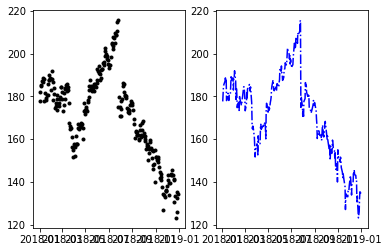

In [6]:
fig, axes = plt.subplots(1, 2)
axes[0].plot(fb.index,fb.open,'.k')
axes[1].plot(fb.index,fb.open,'-.b')

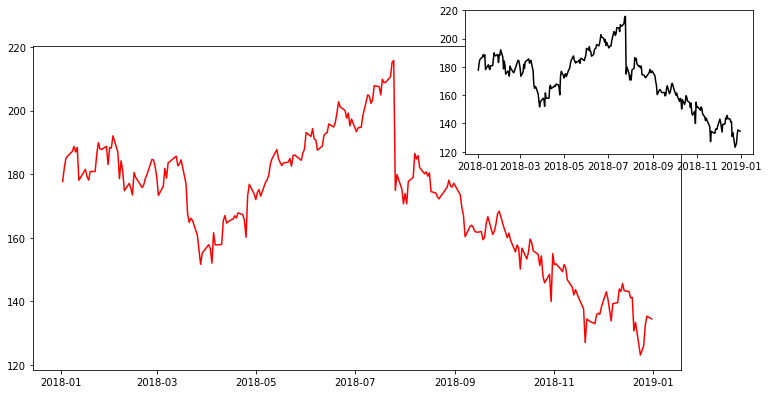

In [18]:
fig = plt.figure(figsize=(10,5))
outside = fig.add_axes([0.1,0.1,0.9,0.9])
inside = fig.add_axes([0.7,0.7,0.4,0.4])
outside.plot(fb.index, fb.open,'-r')
inside.plot(fb.index, fb.open, '-k');

# TASK2

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fb = pd.read_csv(
    'data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)
quakes = pd.read_csv('data/earthquakes.csv')
covid = pd.read_csv('data/covid19_cases.csv').assign(
    date=lambda x: pd.to_datetime(x.dateRep, format='%d/%m/%Y')
).set_index('date').replace(
    'United_States_of_America', 'USA'
).sort_index()['2020-01-18':'2020-09-18']

In [20]:
covid.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
date,,,,,,,,,,,,
2020-01-18,18/01/2020,18,1,2020,0,0,Croatia,HR,HRV,4076246.0,Europe,0.0
2020-01-18,18/01/2020,18,1,2020,0,0,Greece,EL,GRC,10724599.0,Europe,0.0
2020-01-18,18/01/2020,18,1,2020,0,0,United_Kingdom,UK,GBR,66647112.0,Europe,0.0
2020-01-18,18/01/2020,18,1,2020,0,0,Azerbaijan,AZ,AZE,10047719.0,Europe,0.0
2020-01-18,18/01/2020,18,1,2020,0,0,Bahrain,BH,BHR,1641164.0,Asia,0.0


In [21]:
new_cases_rolling_average = covid.pivot_table(
    index=covid.index, 
    columns='countriesAndTerritories', 
    values='cases'
).rolling(7).mean()

In [25]:
new_cases_rolling_average.describe()

countriesAndTerritories,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua_and_Barbuda,Argentina,Armenia,Aruba,...,United_Republic_of_Tanzania,United_States_Virgin_Islands,Uruguay,Uzbekistan,Venezuela,Vietnam,Western_Sahara,Yemen,Zambia,Zimbabwe
count,221.000000,188.000000,224.000000,181.000000,175.000000,170.000000,176.000000,184.000000,224.000000,166.000000,...,180.000000,166.000000,182.000000,181.000000,175.000000,229.000000,140.000000,156.000000,178.000000,176.000000
mean,175.348416,61.117021,216.313138,7.569850,19.561633,0.007563,0.530844,3022.743789,205.395408,18.499139,...,2.814286,7.190189,9.784929,266.296764,346.904490,4.588272,5.434694,12.909341,76.780096,42.888799
std,221.034216,52.136422,192.786729,8.627213,22.352703,0.035648,1.124225,3416.840513,195.307428,31.002191,...,7.109995,9.229023,5.394981,240.866601,398.173201,7.534072,14.291087,10.816722,87.840549,52.598791
min,0.000000,5.285714,0.000000,0.000000,0.000000,0.000000,0.000000,11.142857,0.000000,0.000000,...,0.000000,0.000000,0.285714,4.714286,2.428571,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.571429,15.500000,81.500000,0.428571,1.285714,0.000000,0.000000,139.857143,33.285714,0.000000,...,0.000000,0.285714,5.321429,54.142857,10.285714,0.428571,0.000000,5.214286,6.857143,1.142857
50%,63.857143,50.000000,155.714286,3.857143,6.571429,0.000000,0.142857,1353.571429,149.000000,0.428571,...,0.000000,1.714286,8.928571,160.571429,122.428571,1.571429,0.000000,10.285714,29.071429,15.071429
75%,263.857143,106.928571,381.785714,12.571429,33.428571,0.000000,0.571429,5620.500000,372.000000,34.571429,...,1.000000,10.714286,13.821429,504.000000,686.428571,5.142857,0.285714,20.035714,145.214286,80.178571
max,758.571429,159.857143,622.428571,33.857143,93.857143,0.285714,5.714286,11062.571429,648.428571,90.142857,...,28.714286,35.571429,23.142857,750.142857,1285.285714,36.857143,70.571429,52.142857,301.000000,208.571429


[]

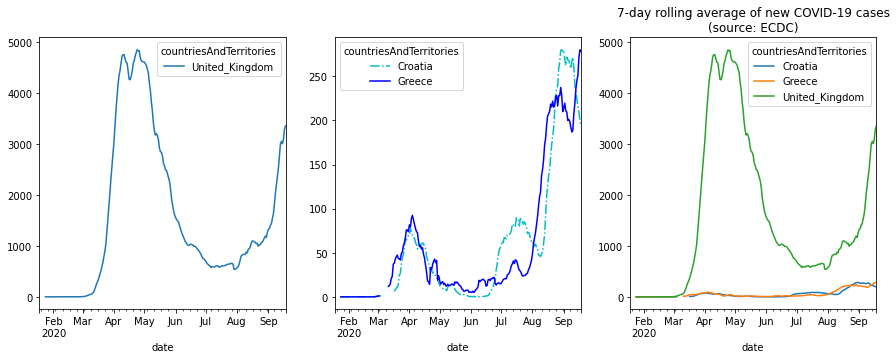

In [31]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

new_cases_rolling_average[['United_Kingdom']].plot(ax=axes[0], style=['-'])
new_cases_rolling_average[['Croatia','Greece']].plot(ax=axes[1], style=['-.c','-b'])


new_cases_rolling_average[['Croatia','Greece','United_Kingdom']].plot(ax=axes[2], style=['-']
,title='7-day rolling average of new COVID-19 cases\n(source: ECDC)').plot(ax=axes[2], style=['-.c', '-b', '-'])

# TASK3

Change the graph above to stacked bar plot, and
normalized stacked bar plot (like below)

Text(0, 0.5, 'count')

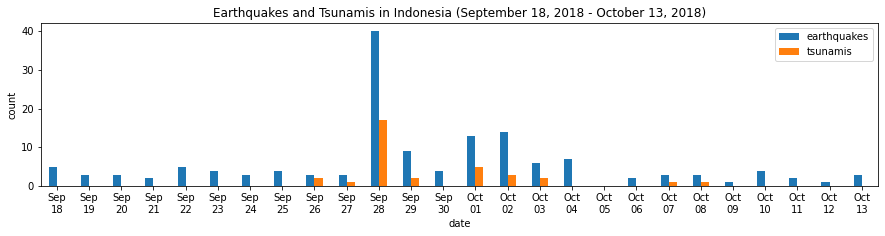

In [34]:
indonesia_quakes = quakes.query('parsed_place == "Indonesia"').assign(
    time=lambda x: pd.to_datetime(x.time, unit='ms'),
    earthquake=1
).set_index('time').resample('1D').sum()

# format the datetimes in the index for the x-axis
indonesia_quakes.index = indonesia_quakes.index.strftime('%b\n%d') # date to string

indonesia_quakes.plot(
    y=['earthquake', 'tsunami'], kind='bar', figsize=(15, 3), 
    rot=0, label=['earthquakes', 'tsunamis'], 
    title='Earthquakes and Tsunamis in Indonesia '
          '(September 18, 2018 - October 13, 2018)'
)

# label the axes (discussed in chapter 6)
plt.xlabel('date')
plt.ylabel('count')

stacked=True

Text(0, 0.5, 'count')

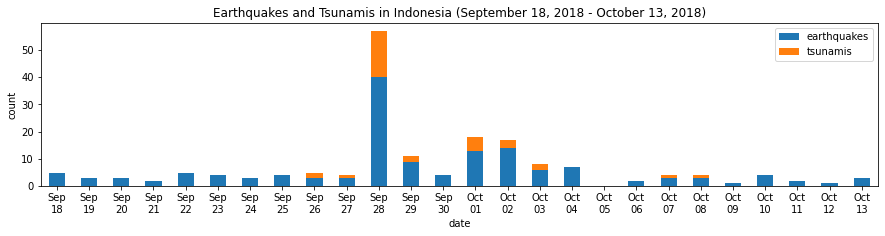

In [35]:
indonesia_quakes.plot(
    y=['earthquake', 'tsunami'], kind='bar', figsize=(15, 3), 
    rot=0, label=['earthquakes', 'tsunamis'], 
    title='Earthquakes and Tsunamis in Indonesia '
          '(September 18, 2018 - October 13, 2018)',
    stacked = True

)

# label the axes (discussed in chapter 6)
plt.xlabel('date')
plt.ylabel('count')

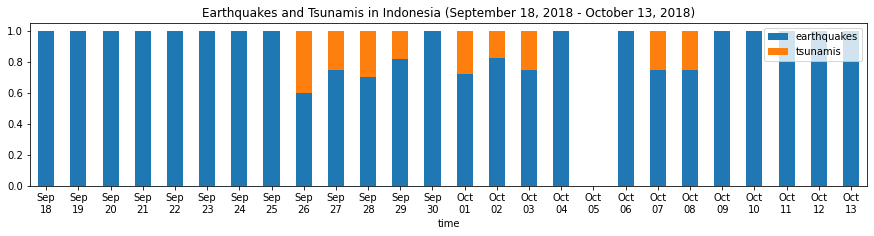

In [37]:
indonesia_quakes[['tsunami', 'earthquake']].apply(lambda x: x / x.sum(), axis=1).plot(
    y=['earthquake', 'tsunami'], kind='bar', figsize=(15, 3), 
    rot=0, label=['earthquakes', 'tsunamis'], 
    title='Earthquakes and Tsunamis in Indonesia '
          '(September 18, 2018 - October 13, 2018)',
    stacked = True
);